In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 500)

# Chargement des données

data = pd.read_csv("data.csv")
description_produit = pd.read_csv("description_produit.csv")
depense_client = pd.read_csv("depense_client.csv")
data_client = pd.read_csv("data_client.csv")
data_client_categ = pd.read_csv("data_client_categ.csv")

In [365]:
data_client.set_index('customer_unique_id', inplace=True)
data_client_categ.set_index('customer_unique_id', inplace=True)

# Partie 1 : Modéles Cluster

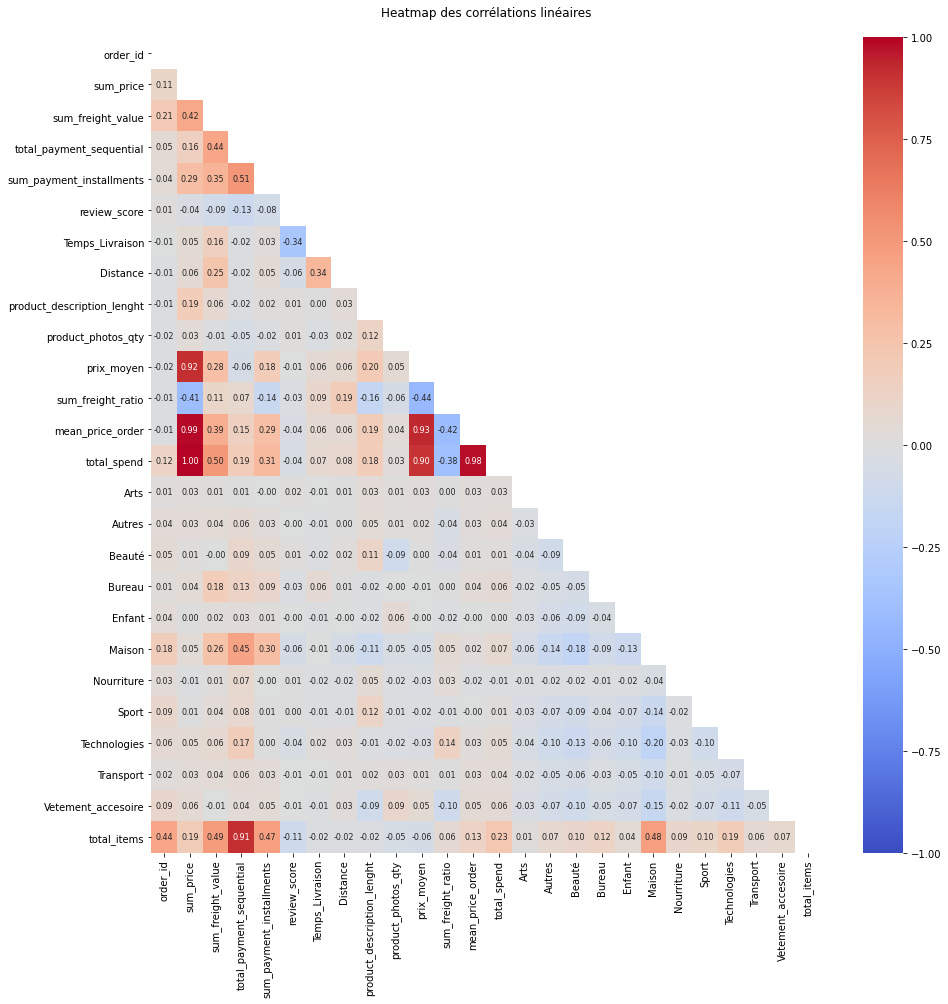

In [366]:
# Dans un premier temps, regardons les corrélations entre les variables de nos datasets

corr = data_client_categ.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                 fmt=".2f", annot_kws={'size': 8},
                 mask=mask,
                 center=0,
                 cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [367]:
# Je vais supprimer la variable mean_price_order

data_client.drop(['mean_price_order', 'prix_moyen'], axis=1, inplace=True)
data_client_categ.drop(
    ['mean_price_order', 'prix_moyen'], axis=1, inplace=True)

## KMeans, StantardScaler et Catégories

In [368]:
# Dans un premier temps, nous allons effectué un KMeans avec les catégories et avec StandardScaler

from sklearn import preprocessing

data_client_categ = data_client_categ.dropna()
std_scale = preprocessing.StandardScaler().fit(data_client_categ)
data_client_categ_sc = std_scale.transform(data_client_categ)

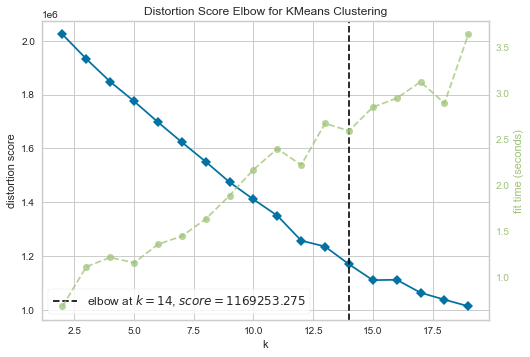

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [369]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(data_client_categ_sc)
visualizer.show()

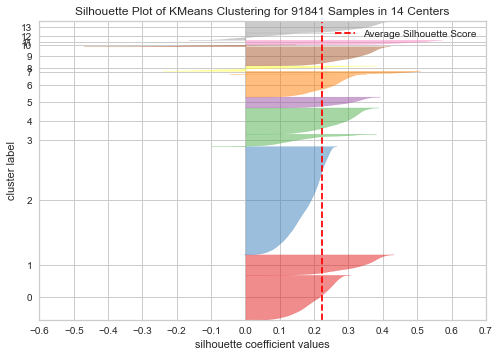

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91841 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [370]:
from yellowbrick.cluster import SilhouetteVisualizer

# Best K in Elbow
K = 14
# Silhouette Visualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(K))
silhouette_visualizer.fit(data_client_categ_sc)
silhouette_visualizer.show()

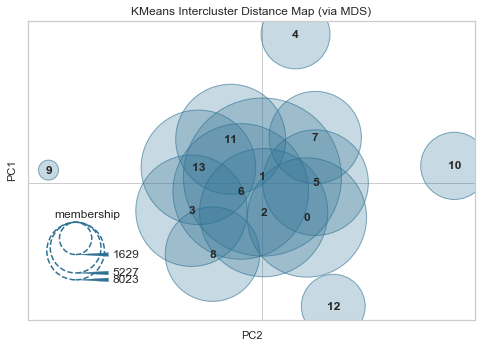

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [371]:
from yellowbrick.cluster import InterclusterDistance

distance_visualizer = InterclusterDistance(KMeans(K))
distance_visualizer.fit(data_client_categ_sc)
distance_visualizer.show()

In [372]:
data_client_categ_kmeans = data_client_categ

In [373]:
kmeans = KMeans(K)
kmeans.fit(data_client_categ_sc)

# Kmeans labels
kmeans_labels = kmeans.labels_
data_client_categ_kmeans["kmeans_label"] = kmeans_labels

kmeans_clusters_means_categ = data_client_categ_kmeans.groupby(
    "kmeans_label").mean().reset_index()
kmeans_clusters_means_categ

,kmeans_label,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend,Arts,Autres,Beauté,Bureau,Enfant,Maison,Nourriture,Sport,Technologies,Transport,Vetement_accesoire,total_items
0,0,1.232895,174.669917,43.149007,2.039561,7.603947,3.721550,11.713085,408.452725,625.940965,1.960091,0.234048,217.818923,0.000219,0.009868,0.013158,0.002851,0.008333,2.214254,0.000219,0.007895,0.032675,0.003947,0.011842,2.305263
1,1,1.288052,474.728920,122.034763,5.118024,25.886848,3.259619,12.315337,456.919206,776.050156,1.815811,0.255318,596.763682,0.001637,0.166939,0.360065,0.328969,0.076923,3.224223,0.001637,0.211129,1.083470,0.063830,0.216039,5.734861
2,2,1.000000,102.810808,21.183812,1.000000,3.078371,4.170340,12.197073,404.904755,650.998237,2.177547,0.213444,123.994620,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,3,1.024392,127.297064,19.132963,1.080727,3.340055,4.232402,11.522831,469.678853,1009.647817,1.800605,0.189971,146.430027,0.000000,0.000271,1.097479,0.000181,0.000181,0.005330,0.000000,0.000271,0.003162,0.000000,0.000000,1.106875
4,4,1.030695,116.923903,21.422826,1.070776,3.078489,4.187450,11.652456,442.159936,749.854283,2.631316,0.198340,138.346730,0.000000,0.001714,0.002181,0.000000,1.074945,0.013556,0.000000,0.002181,0.003428,0.000156,0.004519,1.102680
5,5,1.034256,145.441278,23.046509,1.088395,3.314265,4.221001,11.418731,448.116445,917.134105,2.328505,0.180423,168.487787,0.000000,1.082181,0.004941,0.000165,0.005599,0.016963,0.000000,0.003294,0.006917,0.000000,0.004611,1.124671
6,6,1.052960,1253.792187,67.939016,1.119418,7.209315,4.007788,14.460031,580.234197,1458.759730,2.878609,0.058110,1321.731202,0.021807,0.064174,0.118380,0.007477,0.078505,0.337072,0.001246,0.061682,0.295327,0.047975,0.142679,1.176324
7,7,1.015238,90.100204,18.981076,1.089286,2.362784,4.086745,12.575729,474.845713,756.644718,2.184806,0.264589,109.081280,0.000000,0.000000,0.000285,0.000000,0.000000,0.002706,0.000000,0.000071,1.102677,0.000000,0.000071,1.105810
8,8,1.039944,144.555830,22.037064,1.088017,3.025823,4.322763,11.427470,458.855718,957.915989,2.442957,0.210020,166.592894,1.078486,0.006307,0.003504,0.000701,0.008409,0.016118,0.000000,0.000701,0.005606,0.001402,0.009110,1.130343
9,9,1.042691,117.418433,21.612588,1.114792,2.725006,4.221111,11.776064,435.144091,1083.984440,2.256661,0.199973,139.031021,0.000000,0.000421,0.006319,0.000140,0.000140,0.008426,0.000000,1.137059,0.005336,0.000421,0.002528,1.160792


## KMeans, StandardsScaler et sans les catégories 

In [374]:
data_client = data_client.dropna()
std_scale = preprocessing.StandardScaler().fit(data_client)
data_client_sc = std_scale.transform(data_client)

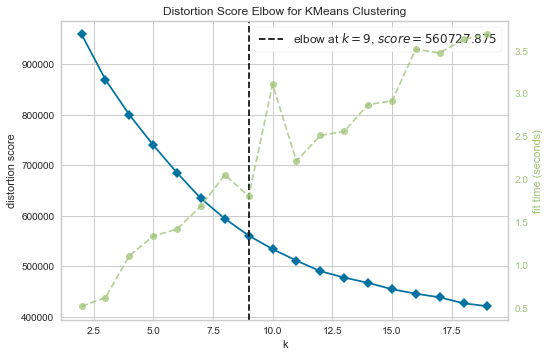

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [375]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(data_client_sc)
visualizer.show()

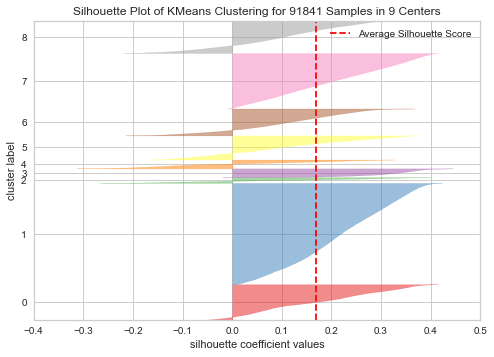

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91841 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [376]:
from yellowbrick.cluster import SilhouetteVisualizer

# Best K in Elbow
K = 9
# Silhouette Visualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(K))
silhouette_visualizer.fit(data_client_sc)
silhouette_visualizer.show()

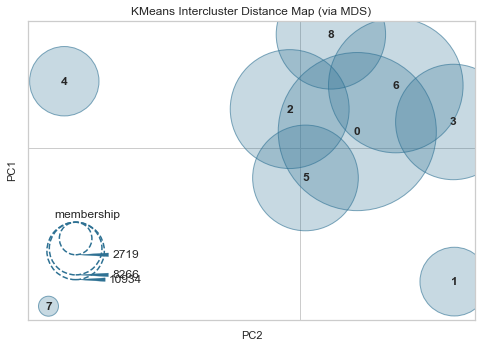

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [377]:
from yellowbrick.cluster import InterclusterDistance

distance_visualizer = InterclusterDistance(KMeans(K))
distance_visualizer.fit(data_client_sc)
distance_visualizer.show()

In [378]:
data_client_kmeans = data_client

In [379]:
kmeans = KMeans(K)
kmeans.fit(data_client_sc)

# Kmeans labels
kmeans_labels = kmeans.labels_
data_client_kmeans["kmeans_label"] = kmeans_labels
kmeans_clusters_means = data_client_kmeans.groupby(
    "kmeans_label").mean().reset_index()
kmeans_clusters_means

,kmeans_label,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend
0,0,1.000000,158.449695,21.367483,1.060819,3.153129,4.447020,10.331396,386.498627,2308.776952,2.364554,0.156274,179.817178
1,1,1.000000,140.148709,18.071861,1.059595,3.346505,4.648411,9.286686,313.052775,612.511515,1.530477,0.137163,158.220570
2,2,2.117295,229.821834,45.077535,1.211155,4.036147,4.198529,11.783865,418.178200,730.441237,2.065998,0.199482,274.899369
3,3,1.033765,1224.656669,68.439606,1.184784,7.394220,4.052962,13.967359,562.589370,1401.829677,2.774821,0.057766,1293.096275
4,4,1.000000,35.405917,18.288995,1.078306,1.879222,4.546672,10.370557,348.345176,538.939406,1.662985,0.357256,53.694912
5,5,1.000091,101.944945,18.218416,1.049767,2.722349,4.477632,9.282774,334.924878,754.283536,5.538179,0.184596,120.163361
6,6,1.020461,271.622597,68.457976,3.226934,17.486342,3.445721,11.471710,445.244594,729.660274,1.841482,0.236598,340.080573
7,7,1.000000,126.758263,35.260104,1.057443,3.470432,4.087314,20.432338,1420.623675,761.490225,2.257347,0.281631,162.018367
8,8,1.000000,120.878623,21.983478,1.154949,3.215657,1.478384,21.223333,383.278529,680.138552,1.926498,0.200856,142.862101


## KMeans, PCA, StantardScaler et Sans les Catégories

In [380]:
data_client.drop(['kmeans_label'], axis=1, inplace=True)

Text(0, 0.5, 'cumulative explained variance')

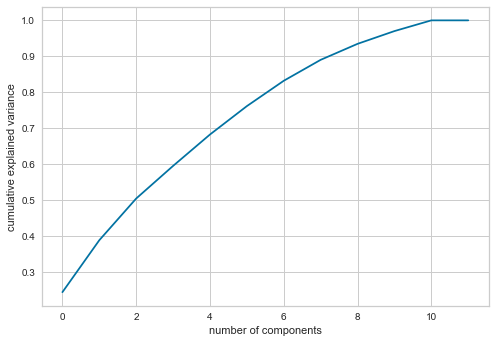

In [381]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_pca = data_client
data_pca = data_pca.dropna()

scaler = StandardScaler()
data_pca_sc = scaler.fit_transform(data_pca)

pca = PCA().fit(data_pca_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [382]:
ratio = pca.explained_variance_ratio_
n_limit = 0.90
n_pca = 0
total_ratio = 0

for i in range(0, len(ratio)):
    total_ratio = total_ratio + ratio[i]
    if total_ratio >= n_limit:
        n_pca = i
        print('ratio total', total_ratio)
        print('nombre de composantes', n_pca)
        break

ratio total 0.9346359853169101
nombre de composantes 8


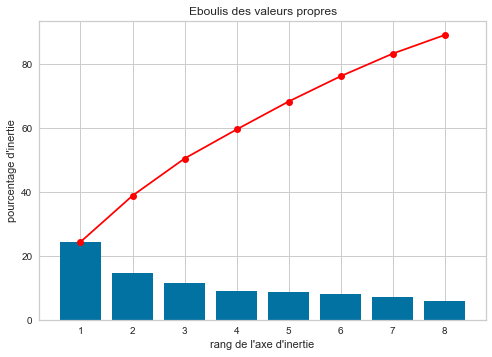

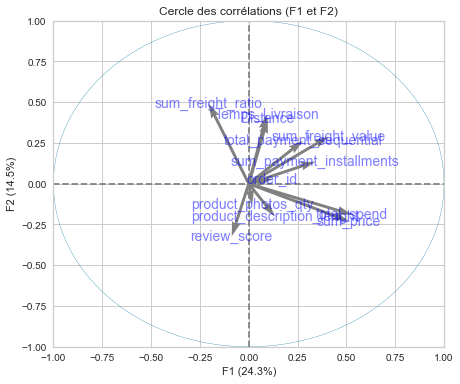

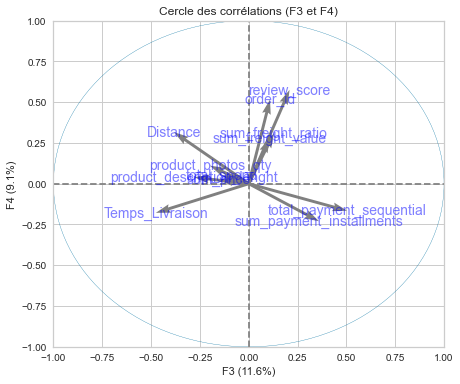

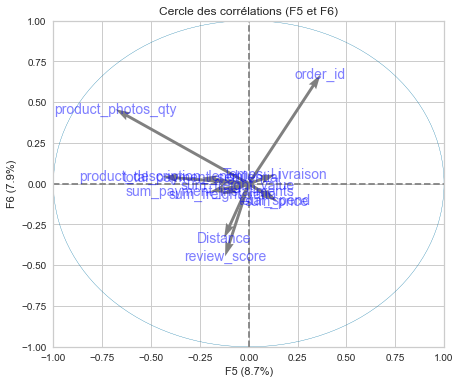

In [383]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = n_pca

# selection des colonnes à prendre en compte dans l'ACP

data_pca = data_client
data_pca = data_pca.dropna()


# préparation des données pour l'ACP

X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
d = pca.fit_transform(X_scaled)
data_pca_test = pd.DataFrame(d)

col = ["pca " + str(n+1) for n in data_pca_test.columns]
data_pca_test.columns = col

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

In [384]:
std_scale = preprocessing.StandardScaler()
std_scale.fit(data_pca_test)
data_pca_sc = std_scale.transform(data_pca_test)

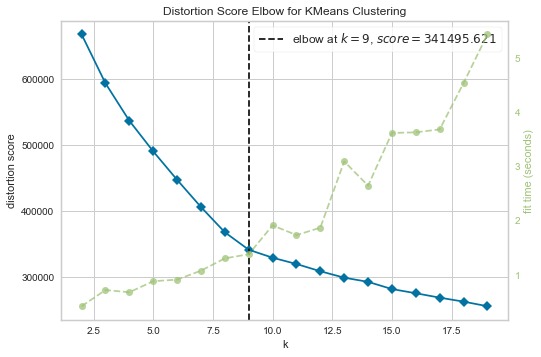

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [385]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(data_pca_sc)
visualizer.show()

In [ ]:
Le nombre de Clusters optimal semble être 9.

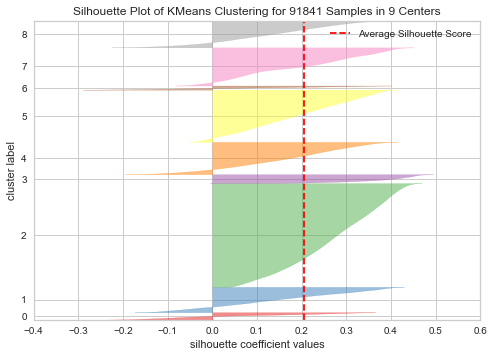

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91841 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [386]:
K = 9

# Silhouette Visualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(K))
silhouette_visualizer.fit(data_pca_sc)
silhouette_visualizer.show()

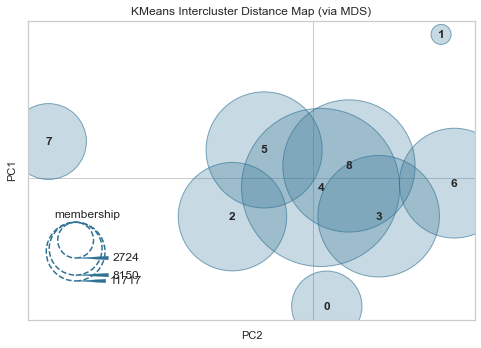

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [387]:
distance_visualizer = InterclusterDistance(KMeans(K))
distance_visualizer.fit(data_pca_sc)
distance_visualizer.show()

In [388]:
kmeans = KMeans(K)
kmeans.fit(data_pca_sc)

data_pca_kmeans = data_client

# Kmeans labels
pca_kmeans_labels = kmeans.labels_
data_pca_kmeans["kmeans_label_pca"] = pca_kmeans_labels
pca_kmeans_cluster = data_pca_kmeans.groupby("kmeans_label_pca").mean()
pca_kmeans_cluster

,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend
kmeans_label_pca,,,,,,,,,,,,
0,1.000000,48.504611,22.897172,1.147737,1.900075,4.496571,9.857312,350.458050,561.376418,1.624922,0.361362,71.401783
1,1.000000,140.021369,17.091878,1.042102,3.387755,4.657184,9.555848,318.881234,597.364484,1.531772,0.140210,157.113247
2,1.000000,124.931195,21.725474,1.154164,3.088309,1.471252,20.996878,379.430182,678.384511,1.893297,0.200577,146.656669
3,1.014668,258.283827,62.111583,3.280145,19.612819,3.464919,10.913462,420.991362,703.793814,1.837491,0.233709,320.395410
4,2.116373,240.124559,46.119927,1.228318,4.172819,4.191488,11.808470,419.729126,732.109908,2.064009,0.198754,286.244486
5,1.000085,111.004963,18.679055,1.052146,2.815396,4.434668,9.462917,348.984465,751.089272,5.512290,0.185993,129.684018
6,1.000000,146.157905,21.309526,1.070741,3.015150,4.402426,10.514187,402.389890,2308.534579,2.242543,0.167134,167.467431
7,1.024390,1371.098245,84.738230,1.269321,6.868849,4.012888,13.657501,542.425892,1438.695495,2.775720,0.067888,1455.836475
8,1.000000,135.633395,33.996879,1.051288,3.637055,4.196564,21.003804,1407.882090,736.485358,2.210061,0.271159,169.630274


## KMeans, MinMaxScaler et Sans les Catégories

In [389]:
data_client = data_client.dropna()
std_scale = preprocessing.MinMaxScaler().fit(data_client)
data_client_sc = std_scale.transform(data_client)

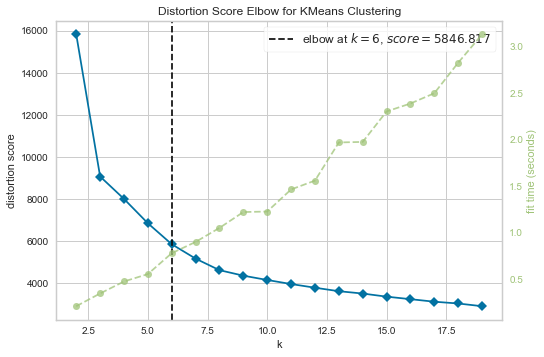

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [390]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(data_client_sc)
visualizer.show()

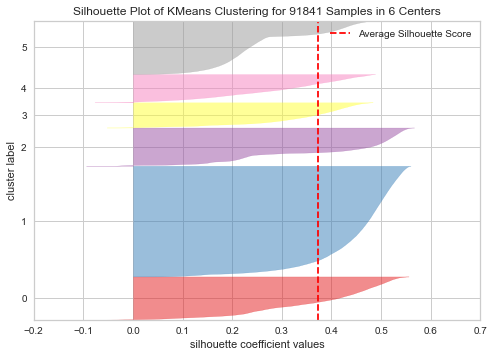

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91841 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [391]:
K = 6

# Silhouette Visualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(K))
silhouette_visualizer.fit(data_client_sc)
silhouette_visualizer.show()

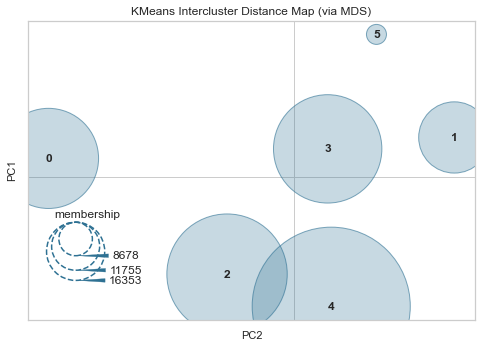

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [392]:
distance_visualizer = InterclusterDistance(KMeans(K))
distance_visualizer.fit(data_client_sc)
distance_visualizer.show()

In [393]:
kmeans = KMeans(K)
kmeans.fit(data_client_sc)

data_client_minmax_kmeans = data_client

# Kmeans labels
data_client_minmax_kmeans_labels = kmeans.labels_
data_client_minmax_kmeans["kmeans_label"] = data_client_minmax_kmeans_labels
kmeans_clusters_means_minmax = data_client_minmax_kmeans.groupby(
    "kmeans_label").mean()
kmeans_clusters_means_minmax

,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend,kmeans_label_pca
kmeans_label,,,,,,,,,,,,,
0,1.000412,113.963601,19.502240,1.115698,3.229408,4.999941,9.398358,324.934443,588.605282,1.561182,0.209443,133.465840,0.738246
1,1.029349,164.928037,28.423908,1.323969,4.502464,1.232272,19.635402,473.656274,764.904548,2.176761,0.212325,193.351945,2.761803
2,1.020857,237.666939,25.041472,1.088124,3.408491,4.587271,10.450347,422.067790,2271.603625,2.486319,0.158275,262.708411,5.997234
3,1.181484,141.761949,23.937737,1.119053,3.385769,4.592146,9.601533,356.020541,696.232331,4.837244,0.188801,165.699686,4.816189
4,1.001553,184.524094,37.270272,1.062555,3.718353,4.468713,19.397284,1353.360717,699.830401,2.174595,0.263641,221.794366,7.948758
5,1.008439,112.169874,21.158104,1.152686,3.346800,3.686086,11.700722,341.638077,589.080713,1.572897,0.218779,133.327978,0.846389


# Modèle sélectionné

In [426]:
data_client = data_client.dropna()
std_scale = preprocessing.StandardScaler().fit(data_client)
data_client_sc = std_scale.transform(data_client)

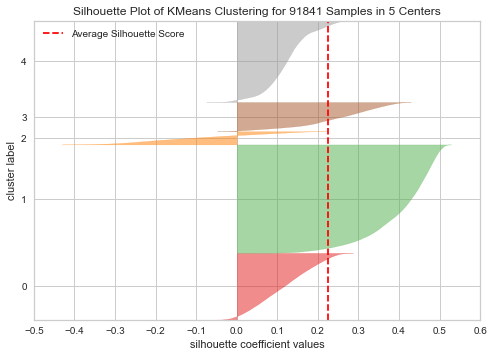

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91841 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [427]:
K = 5

# Silhouette Visualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(K))
silhouette_visualizer.fit(data_client_sc)
silhouette_visualizer.show()

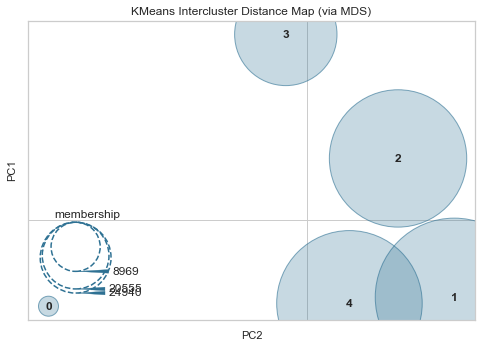

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [428]:
distance_visualizer = InterclusterDistance(KMeans(K))
distance_visualizer.fit(data_client_sc)
distance_visualizer.show()

In [429]:
data_client_kmeans = data_client

kmeans = KMeans(K)
kmeans.fit(data_client_sc)

# Kmeans labels
kmeans_labels = kmeans.labels_
data_client_kmeans["kmeans_label"] = kmeans_labels
kmeans_clusters_means = data_client_kmeans.groupby(
    "kmeans_label").mean().reset_index()
kmeans_clusters_means

,kmeans_label,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend,kmeans_label_pca
0,0,1.183179,778.276481,77.495328,2.186147,12.549546,3.755190,13.267173,508.109763,1097.919431,2.302817,0.133776,855.771809,4.430497
1,1,1.093083,123.573293,20.304128,1.065568,2.929420,4.453182,9.613609,336.676817,1291.756289,4.058241,0.178441,143.877421,5.236912
2,2,1.000000,106.317798,18.607063,1.086186,2.981821,4.999940,9.364632,323.061863,585.460870,1.561592,0.210400,124.924861,0.713424
3,3,1.019949,128.573721,34.122208,1.059894,3.582146,4.126355,21.257727,1396.910456,821.660537,2.301961,0.273027,162.695929,7.649950
4,4,1.011181,106.867697,20.551632,1.142723,3.157816,2.803131,14.282468,352.747053,608.042772,1.674302,0.218461,127.419329,1.246744


In [430]:
data_client_kmeans_bis = data_client_categ
data_client_kmeans_bis["kmeans_label"] = kmeans_labels
kmeans_clusters_means_bis = data_client_kmeans_bis.groupby(
    "kmeans_label").mean().reset_index()
kmeans_clusters_means_bis

,kmeans_label,order_id,sum_price,sum_freight_value,total_payment_sequential,sum_payment_installments,review_score,Temps_Livraison,Distance,product_description_lenght,product_photos_qty,sum_freight_ratio,total_spend,Arts,Autres,Beauté,Bureau,Enfant,Maison,Nourriture,Sport,Technologies,Transport,Vetement_accesoire,total_items
0,0,1.183179,778.276481,77.495328,2.186147,12.549546,3.755190,13.267173,508.109763,1097.919431,2.302817,0.133776,855.771809,0.031944,0.125031,0.180185,0.132019,0.093836,1.094584,0.024457,0.137010,0.373846,0.094335,0.169953,2.457200
1,1,1.093083,123.573293,20.304128,1.065568,2.929420,4.453182,9.613609,336.676817,1291.756289,4.058241,0.178441,143.877421,0.019103,0.081369,0.129198,0.034171,0.095076,0.338842,0.011180,0.129539,0.155981,0.052885,0.116415,1.163758
2,2,1.000000,106.317798,18.607063,1.086186,2.981821,4.999940,9.364632,323.061863,585.460870,1.561592,0.210400,124.924861,0.017189,0.069567,0.149153,0.038098,0.071966,0.353562,0.013709,0.077636,0.165922,0.038248,0.091135,1.086186
3,3,1.019949,128.573721,34.122208,1.059894,3.582146,4.126355,21.257727,1396.910456,821.660537,2.301961,0.273027,162.695929,0.019057,0.071659,0.155244,0.049816,0.072662,0.248412,0.006241,0.081467,0.202496,0.049147,0.124819,1.081021
4,4,1.011181,106.867697,20.551632,1.142723,3.157816,2.803131,14.282468,352.747053,608.042772,1.674302,0.218461,127.419329,0.012463,0.069290,0.122430,0.046968,0.072136,0.418587,0.011421,0.076584,0.198413,0.037991,0.088687,1.154971


# Partie 3 : Analyse des clusters 

([<matplotlib.axis.XTick at 0x25db1977d60>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

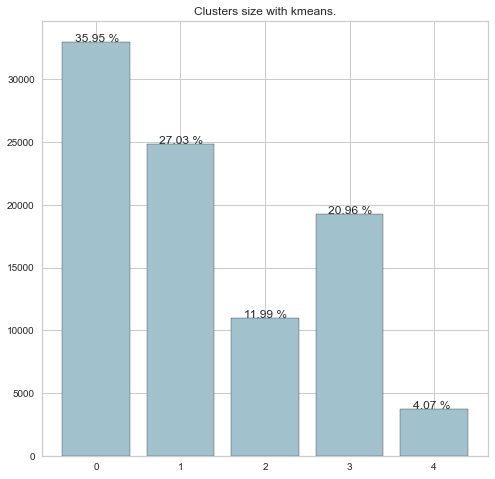

In [37]:
# Je vais maintenant essayer de déterminer les tailles de chaque Cluster

cluster_size = {}
for i in data_client_kmeans_bis["kmeans_label"]:
    if i not in cluster_size:
        cluster_size[i] = 1
    else:
        cluster_size[i] += 1

fig = plt.figure(figsize=[8, 8])
plt.title("Clusters size with kmeans.")
plt.bar(range(0, len(cluster_size)), cluster_size.values(),
        color="#a1c2cc", edgecolor='black')
for i, num in enumerate(cluster_size.keys()):
    height = cluster_size[num]+20
    x = i-0.25
    pourcent = cluster_size[num] / \
        data_client_kmeans_bis["kmeans_label"].shape[0]*100
    plt.text(x, height, "{} % ".format(round(pourcent, 2)))
plt.xticks(range(0, len(cluster_size)), cluster_size.keys())

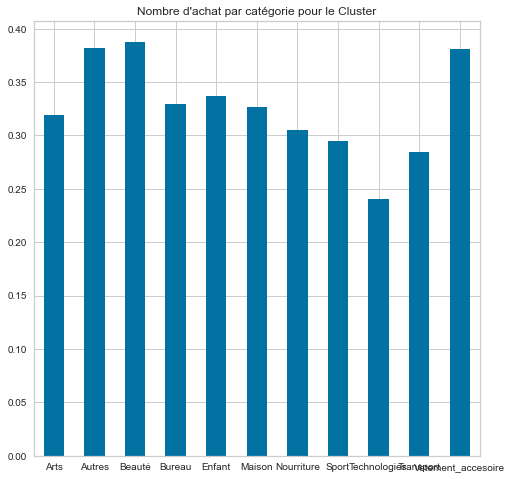

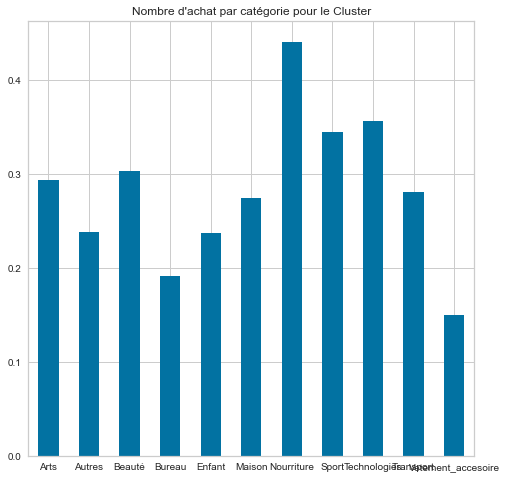

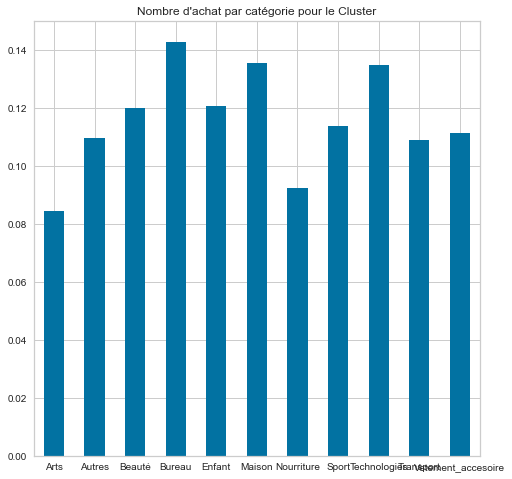

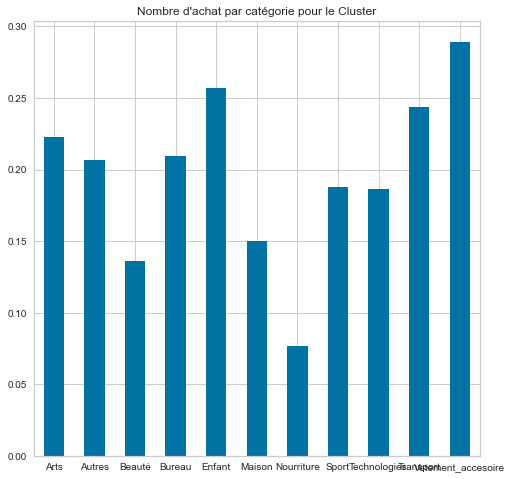

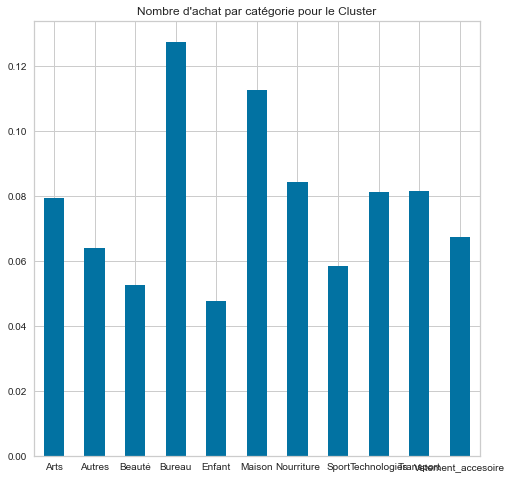

In [97]:
# Je vais essayer de mettre en lumière les différences entre chaque cluster grâce aux catégories d'achats.
# Pour diminuer, les différences trop important de certains catégories, comme Maison, j'ai décidé de diviser par le nombre total
# d'achat par catégorie.

list_categ = [
    'Arts', 'Autres', 'Beauté', 'Bureau', 'Enfant', 'Maison', 'Nourriture',
    'Sport', 'Technologies', 'Transport', 'Vetement_accesoire'
]

for i in range(0, 5):
    total_categ = data_client_kmeans_bis[list_categ].sum()
    subset = data_client_kmeans_bis[data_client_kmeans_bis['kmeans_label'] ==
                                    i]
    subset = subset[list_categ]

    subset_sum = subset.sum() / total_categ
    fig = plt.figure(figsize=[8, 8])
    plt.title("Nombre d'achat par catégorie pour le Cluster")
    subset_sum.plot.bar(rot=0)

# Partie 4 : Fréquence de renouvellement 

In [417]:
data['order_purchase_timestamp'] = pd.to_datetime(
    data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(
    data['order_delivered_customer_date'])

In [418]:
import datetime

essai = data[(data["order_purchase_timestamp"] >= data["order_purchase_timestamp"].min())
             & (data["order_purchase_timestamp"] < data["order_purchase_timestamp"].min() + datetime.timedelta(days=180))]

In [419]:
data_client_init = essai.groupby("customer_unique_id")\
    .agg({"order_id": "nunique",
          "price": "sum",
          "freight_value": "sum",
          "total_payment_sequential": 'mean',
          "sum_payment_installments": 'mean',
          "review_score": "mean",
          "Temps_Livraison": "mean",
          "Distance": "mean"})

In [420]:
data_client_init = pd.merge(
    data_client_init, description_produit, how="left", on="customer_unique_id")
data_client_init = pd.merge(
    data_client_init, depense_client, how="left", on="customer_unique_id")

In [421]:
data_client_init["freight_ratio"] = data_client_init["freight_value"] / \
    (data_client_init["price"] + data_client_init["freight_value"])
data_client_init["mean_price_order"] = data_client_init["price"] / \
    data_client_init["order_id"]
data_client_init["total_spend"] = (
    data_client_init["price"] + data_client_init["freight_value"])

In [422]:
data_client_init = data_client_init.dropna()
data_client_init.set_index('customer_unique_id', inplace=True)

std_scale = preprocessing.StandardScaler().fit(data_client_init)
data_client_init_sc = std_scale.transform(data_client_init)

kmeans = KMeans(5, random_state=42)
kmeans.fit(data_client_init_sc)
data_client_init_labels = kmeans.labels_

In [423]:
from sklearn.metrics.cluster import adjusted_rand_score
ari_score = []
ari_p = adjusted_rand_score(data_client_init_labels, data_client_init_labels)
ari_score.append([0, ari_p])

In [424]:
for i in range(1, 10):
    essai = data[(data["order_purchase_timestamp"] >=
                  data["order_purchase_timestamp"].min())
                 & (data["order_purchase_timestamp"] <
                    data["order_purchase_timestamp"].min() +
                    datetime.timedelta(days=180 + i * 61))]
    data_client_p = essai.groupby("customer_unique_id")\
        .agg({"order_id": "nunique",
              "price": "sum",
              "freight_value": "sum",
              "total_payment_sequential": 'mean',
              "sum_payment_installments": 'mean',
              "review_score": "mean",
              "Temps_Livraison": "mean",
              "Distance": "mean"})
    data_client_p = pd.merge(data_client_p,
                             description_produit,
                             how="left",
                             on="customer_unique_id")
    data_client_p = pd.merge(data_client_p,
                             depense_client,
                             how="left",
                             on="customer_unique_id")

    data_client_p["freight_ratio"] = data_client_p["freight_value"] / \
        (data_client_p["price"] + data_client_p["freight_value"])
    data_client_p["mean_price_order"] = data_client_p["price"] / \
        data_client_p["order_id"]
    data_client_p["total_spend"] = (data_client_p["price"] +
                                    data_client_p["freight_value"])

    data_client_p.set_index('customer_unique_id', inplace=True)

    data_client_p = data_client_p[data_client_p.index.isin(
        data_client_init.index)]

    data_client_p = data_client_p.dropna()
    std_scale = preprocessing.StandardScaler().fit(data_client_p)
    data_client_p_sc = std_scale.transform(data_client_p)

    kmeans = KMeans(5, random_state=42)
    kmeans.fit(data_client_p_sc)
    data_client_p_labels = kmeans.labels_
    ari_p = adjusted_rand_score(data_client_init_labels, data_client_p_labels)
    ari_score.append([2 * i, ari_p])

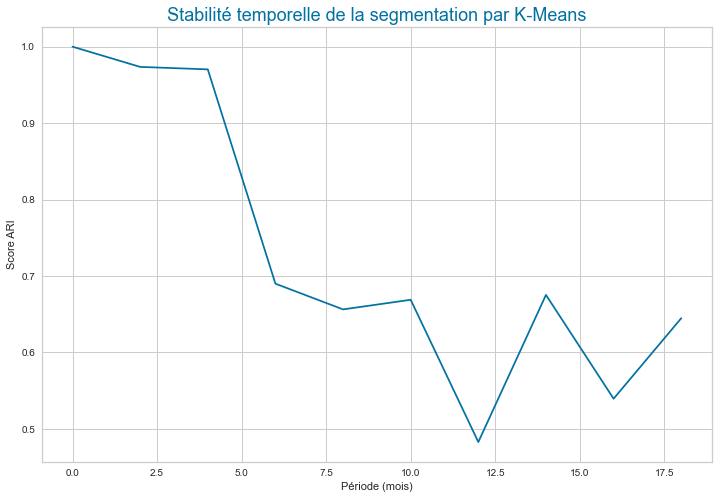

In [425]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=ari_score, x="periode", y="ARI")
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize=18,
          color="b")
plt.show()